<a href="https://colab.research.google.com/github/bogdan-p-s/educational_projects/blob/master/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%A0%D1%83%D1%81%D1%81%D0%BA%D0%B8%D0%B9_%D0%A1%D1%82%D0%B0%D0%BD%D0%B4%D0%B0%D1%80%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

In [ ]:
''' Задание 1
всего приборов - 100, бракованных - 5, проверяют 4 случайных. Необходимо найти вероятность того, что не забракуют партию '''

# вероятность вытащить исправный
p1 = 95/100 
p2 = 94/99 # каждый раз снижается количество оставшихся исправных приборов, как и общее количество
p3 = 93/98
p4 = 92/97

P = p1*p2*p3*p4
print(P)

# или таким способом:
import math
def f(x):
  return math.factorial(x)
good = f(95)/(f(4)*f(91))
all = f(100)/(f(4)*f(96))

print(good/all)

0.8118751155570006
0.8118751155570006


# Задание 2

In [ ]:
'''задание 2
Моделируется время потраченное на занятия как экспоненциальная величина с неизвестным параметром λ, времена потраченные в разные недели независимые.
Время занятий за первые 5 недель: 10 14 18 8 20
Найти оценку максимума правдоподобия параметра - λ' 
n = 5 
∑y = 70

Плотность вероятностей получения величины:
f = П λe^(-λy) # произведения отдельных плотностей от 1 до 5 значений
l(λ) = ∑(ln(λ) + (-λy)) = 5 ln(λ)-λ∑y

находим производную и приравниваем к 0, чтобы найти экстремум:
5/λ' - ∑y = 0
λ' = 5/∑y
λ' = 5/70
'''

# Задание 4

In [ ]:
''' Задание 4.
Написать код SQL – запроса к таблице данных из задачи 3 (каждая задача решается одним запросом):
1)	Количество уникальных/неуникальных Client_id.

select count(CLIENT_ID) as count_id, count(distinct(CLIENT_ID)) as count_uniq_id
from data

2)	Посчитать долю значений целевого признака (target=1) в разрезе категорий образования.
-- Доля едениц внутри каждой группы образования
with
       all_entries as (SELECT EDUCATION, count(*) as count_all FROM data group by EDUCATION),
       only_true as (SELECT EDUCATION, count(*) as count_one FROM data group by EDUCATION where Target=1 group by EDUCATION)
select all_entries.EDUCATION, count_one, count_all, (count_one*100/count_all) as rate
from all_entries join only_true on all_entries.EDUCATION = only_true.EDUCATION

-- Доля едениц каждой группы относительно всех групп (сумма=100%)

select EDUCATION, (Count(*)* 100/ (select Count(*) from data where Target=1)) as rate
From data
where Target=1
group by EDUCATION

3)	На сколько в среднем доход семьи заемщиков с Client_id=2n, больше дохода семьи заемщиков с Client_id=2n+1, где n - произвольное целое число.

Если я правильно понял, задача сводится к выделению группы четных и нечетных id (кроме id=1, т к отсчет пойдет от 2*1=2)

select AVG(PROFIT_FAMILY) - (select avg(PROFIT_FAMILY) FROM data ml where (CLIENT_ID%2=1) and CLIENT_ID!=1)
FROM data where (CLIENT_ID%2=0)  and CLIENT_ID!=1
'''


# Задание 5

In [58]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Тестовые/appl_score_sample.csv', sep = ';')

# первые 20 строк и только 1 и 5 колонку
subset_1 = data.iloc[:, [0,4]].head(20)

# Мужчины со стажем > 50 мес:
subset_2 = data[(data.SEX==1)&(data.STANDING_IN_MONTHS_LAST>50)]

# Общий доход и логарифм от него
data['CI'] = data['DCI'] + data['UCI']
data['CI_log'] = np.log(data['CI']+1)

# Средние доходы по категориям образования
CI_by_education = data.pivot_table(index='EDUCATION', values='CI').reset_index()
CI_by_education.columns = ['EDUCATION', 'MEAN_CI']

# Замена отрицательных значений
data.loc[data.TRANSPORT_AMOUNT<0, 'TRANSPORT_AMOUNT'] = data[data.TRANSPORT_AMOUNT>=0].TRANSPORT_AMOUNT.median()

# Задание 3

In [ ]:
''' Задание 3 '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
!pip install CatBoost
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
#from sklearn.decomposition import PCA

from sklearn.metrics import roc_auc_score, accuracy_score

!pip install shap
import shap

SEED = 42

- CLIENT_ID	ID клиента 
- SEX	пол (0 - женский, 1 - мужской)
- CHILD_FLAG	признак наличия детей (1/0-есть/нет) 
- REALTY_FLAG	признак наличия недвижимости (1/0-есть/нет) 
- ACCOUNTS_FLAG	признак счета в Банке (1/0-есть/нет)
- E_MAIL_FLAG	признак наличия электронной почты (1/0-есть/нет)
- DCI	доход в руб.
- PROFIT_FAMILY	доход семьи в руб. 
- UCI	доход по неосновному месту работы в руб. 
- FOREIGN_PASSPORT_FLAG	признак наличия паспорта (1/0-есть/нет) 
- STANDING_IN_MONTHS_LAST	стаж работы на последнем месте работы в мес. 
- EDUCATION	образование 
- TRANSPORT_AMOUNT	количество ТС в собственности
- Target	целевой признак (который нужно предсказать)

EDUCATION
- 1 - ученая степень/MBA
- 2 - второе высшее
- 3 - высшее;
- 4 - неоконченное высшее;
- 5 - - среднее специальное
- 6 - среднее;
- 7 - ниже среднего;
- -1 - не указано


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Тестовые/appl_score_sample.csv', sep = ';')

#### Общая информация

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CLIENT_ID                2163 non-null   int64  
 1   SEX                      2163 non-null   int64  
 2   CHILD_FLAG               2163 non-null   int64  
 3   REALTY_FLAG              2163 non-null   int64  
 4   ACCOUNTS_FLAG            2163 non-null   int64  
 5   E_MAIL_FLAG              2163 non-null   int64  
 6   DCI                      2163 non-null   float64
 7   PROFIT_FAMILY            2163 non-null   float64
 8   UCI                      2163 non-null   float64
 9   FOREIGN_PASSPORT_FLAG    2163 non-null   int64  
 10  STANDING_IN_MONTHS_LAST  2163 non-null   int64  
 11  EDUCATION                2163 non-null   int64  
 12  TRANSPORT_AMOUNT         2163 non-null   int64  
 13  Target                   2163 non-null   int64  
dtypes: float64(3), int64(11)

In [ ]:
df.isna().mean()

SEX                        0.0
CHILD_FLAG                 0.0
REALTY_FLAG                0.0
ACCOUNTS_FLAG              0.0
E_MAIL_FLAG                0.0
DCI                        0.0
PROFIT_FAMILY              0.0
UCI                        0.0
FOREIGN_PASSPORT_FLAG      0.0
STANDING_IN_MONTHS_LAST    0.0
EDUCATION                  0.0
TRANSPORT_AMOUNT           0.0
Target                     0.0
CI                         0.0
CI_log                     0.0
profit_family_log          0.0
standing_log               0.0
dtype: float64

In [ ]:
df.Target.mean()

0.5002311604253352

Выборка сбалансирована

Линейная корреляция признаков:

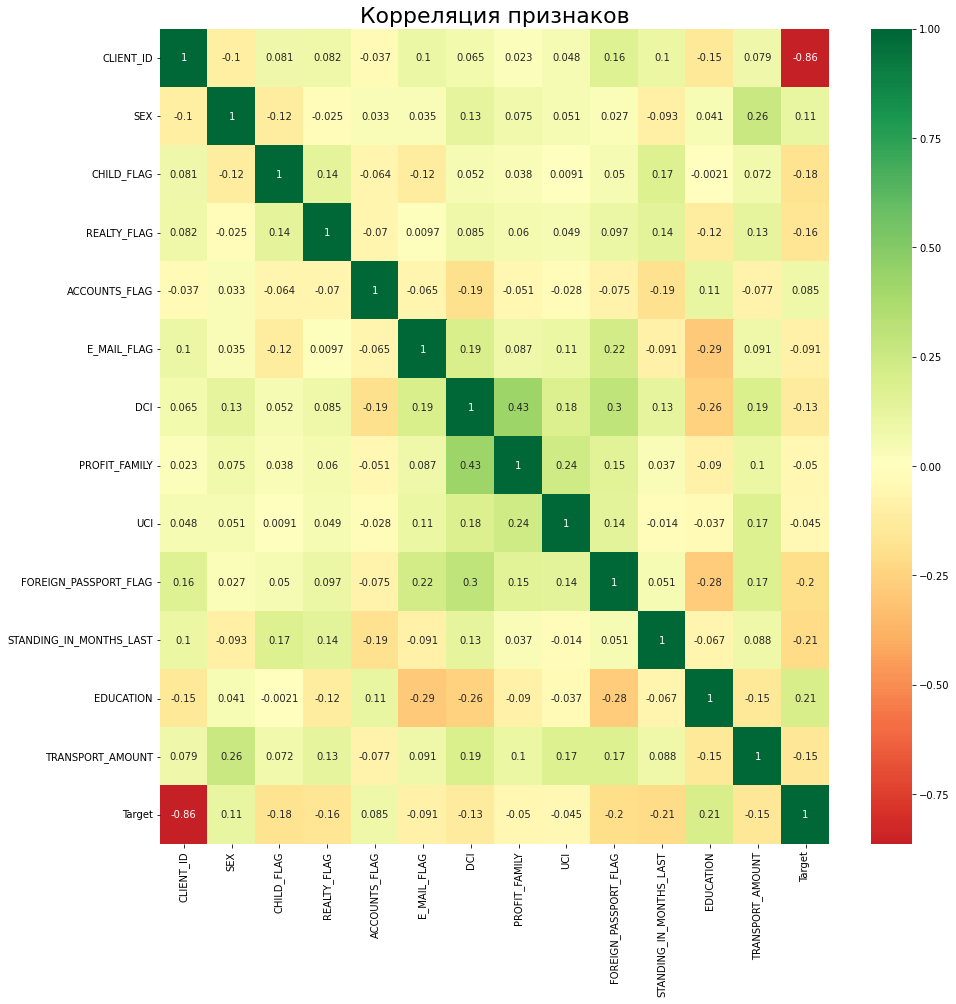

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляция признаков', fontsize=22)
plt.show()

#### CLIENT_ID - высокая отрицательная корреляция этого признака с таргетом вызвана тем, в что в датасете все записи с таргетом = 1 идут первыми по порядку, начиная с 1 CLIENT_ID. Данный признак необходимо удалить

In [ ]:
df.CLIENT_ID.value_counts()

2093    2
2047    1
1324    1
1334    1
1332    1
       ..
617     1
619     1
621     1
623     1
2049    1
Name: CLIENT_ID, Length: 2162, dtype: int64

In [ ]:
df[df.CLIENT_ID==2093]

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,Target
2092,2093,1,1,0,0,0,25453.1191,30453.1191,5000.0,0,35,5,0,0
2093,2093,1,1,0,0,0,25453.1191,30453.1191,5000.0,0,35,5,0,1


Т.к. логика наполнения базы данных неизвестна (скорее всего это ошибка, т к, если бы клиент обращался дважды в разное время, что объяснило бы задвоение записи, но в этом случае был бы разный стаж), удалим данные с этим id 

In [ ]:
df = df[df['CLIENT_ID']!=2093].copy()
df = df.drop('CLIENT_ID', axis=1)

#### SEX и CHILD_FLAG

In [ ]:
df.pivot_table(index='SEX', values='Target', aggfunc=('count', 'mean'))

,count,mean
SEX,,
0,1098.0,0.444444
1,1063.0,0.557855


In [ ]:
df.pivot_table(index='CHILD_FLAG', values='Target', aggfunc=('count', 'mean'))

,count,mean
CHILD_FLAG,,
-1,2.0,0.500000
0,1042.0,0.592131
1,1117.0,0.414503


In [ ]:
# так как записей с отрицательным значением всего 2, удалим их
df = df[df.CHILD_FLAG>=0].copy()

df.pivot_table(index='CHILD_FLAG', values='Target', aggfunc=('count', 'mean'))

,count,mean
CHILD_FLAG,,
0,1042.0,0.592131
1,1117.0,0.414503


Клиенты с детьми более ответственные, судя по всему

EDUCATION - образование
- 1 - ученая степень/MBA
- 2 - второе высшее
- 3 - высшее;
- 4 - неоконченное высшее;
- 5 - - среднее специальное
- 6 - среднее;
- 7 - ниже среднего;
- -1 - не указано

In [ ]:
df.pivot_table(index='EDUCATION', values='Target', aggfunc=('count', 'mean'))

,count,mean
EDUCATION,,
1,7.0,0.285714
2,40.0,0.325000
3,678.0,0.327434
4,264.0,0.704545
5,808.0,0.517327
6,352.0,0.656250
7,10.0,0.800000


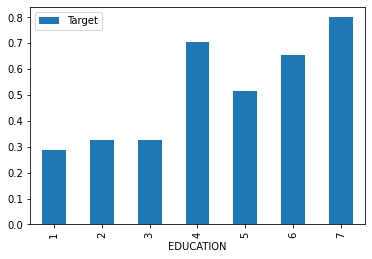

In [ ]:
df.pivot_table(index='EDUCATION', values='Target').plot(kind='bar')

Ввиду малочисленности представителей 1 и 7 категорий, объединим пользователей 1, 2 и 3 категорий в одну (показатели таргета нам это позволяют) и аналогично 6-7 

(!!!)(на больших данных, возможно, этого делать не стоило бы, необходимо проверять)

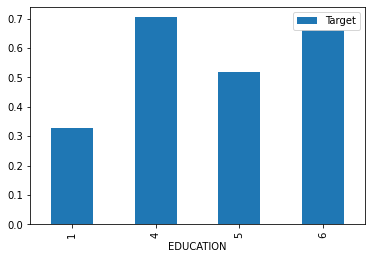

In [ ]:
df.loc[df.EDUCATION.isin([1,2,3]), 'EDUCATION'] = 1
df.loc[df.EDUCATION.isin([6,7]), 'EDUCATION'] = 6

df.pivot_table(index='EDUCATION', values='Target').plot(kind='bar');

#### E_MAIL_FLAG - наличие электронной почты

In [ ]:
df.pivot_table(index='E_MAIL_FLAG', values='Target')

,Target
E_MAIL_FLAG,
0,0.525704
1,0.420952


In [ ]:
df.pivot_table(index='E_MAIL_FLAG')

,ACCOUNTS_FLAG,CHILD_FLAG,DCI,EDUCATION,EDUCATION2,FOREIGN_PASSPORT_FLAG,PROFIT_FAMILY,REALTY_FLAG,SEX,STANDING_IN_MONTHS_LAST,TRANSPORT_AMOUNT,Target,UCI
E_MAIL_FLAG,,,,,,,,,,,,,
0,0.105263,0.549572,17135.533630,4.542228,4.006732,0.107099,34987.756417,0.489596,0.48164,52.891065,0.206242,0.525704,3429.526029
1,0.060952,0.417143,31295.613511,3.765714,2.754286,0.295238,52266.622379,0.500952,0.52381,40.596190,0.306667,0.420952,6944.320267


Я бы не спешил удалять этот признак. У катеогрии людей с E_MAIL_FLAG=0:
- меньше доход, в том числе семьи и по неосновному месту
- больше стаж работы
- меньше транспорта в собственности

Возможно часть нулей в этом признаке связана с тем, что данные клиенты являются пожилыми людьми и электронной почтой не пользуются, т е этот признак может свидетельствовать о возрасте клиента (которого у нас нет)

#### REALTY_FLAG - признак наличия недвижимости (1/0-есть/нет) 

In [ ]:
df.pivot_table(index='REALTY_FLAG', values='Target', aggfunc=('count', 'mean'))

,count,mean
REALTY_FLAG,,
0,1096.0,0.578467
1,1063.0,0.419567


Все логично

#### ACCOUNTS_FLAG

In [ ]:
df.pivot_table(index='ACCOUNTS_FLAG', values='Target', aggfunc=('count', 'mean'))

,count,mean
ACCOUNTS_FLAG,,
0,1955.0,0.486445
1,204.0,0.632353


Большой процент штрафников в категории "имеется счет" вызывает вопросы,при этом, количество таких клиентов существенно ниже.

Пока оставим это признак без измнений

#### DCI, PROFIT_FAMILY, UCI

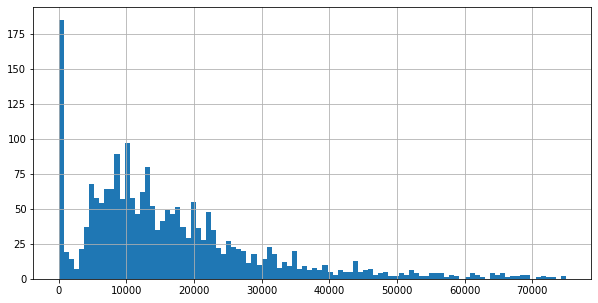

In [ ]:
df.DCI.hist(bins=100, range=(0, 75000), figsize=(10, 5))

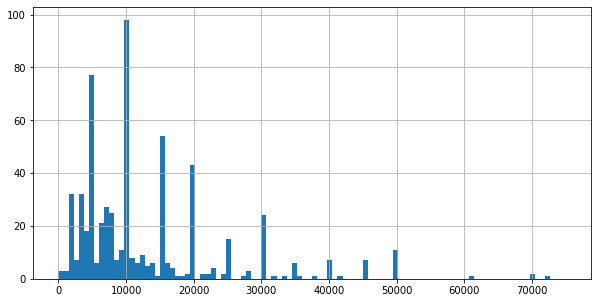

In [ ]:
df[df.UCI>0].UCI.hist(bins=100, range=(0, 75000), figsize=(10, 5))

Взглянем на клиентов с нулевыми основными доходами и долю target=1: 

In [ ]:
print('count', len(df[df.DCI==0]), '{:.2%}'.format(len(df[df.DCI==0])/len(df)))
print(df[df.DCI==0].Target.mean())

print('count', len(df[df.DCI>0]), '{:.2%}'.format(len(df[df.DCI>0])/len(df)))
print(df[df.DCI>0].Target.mean())

count 181 8.38%
0.6519337016574586
count 1978 91.62%
0.4863498483316481


Людей с нулевым личным доходом мало, но они есть

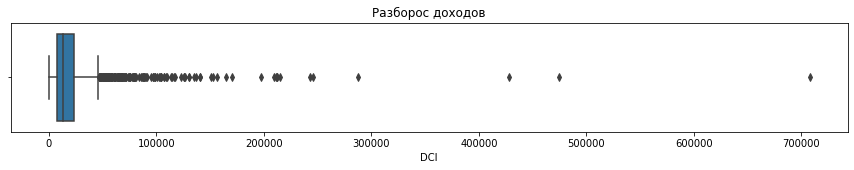

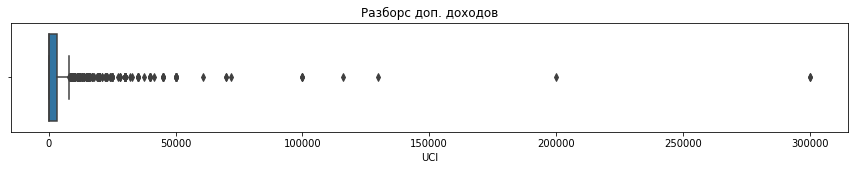

In [ ]:
plt.figure(figsize=(15, 2))
sns.boxplot(x=df.DCI).set_title('Разборос доходов')

plt.figure(figsize=(15, 2))
#plt.xlim(-200000, 5000000)
sns.boxplot(x=df.UCI).set_title('Разборс доп. доходов')
plt.show()

Есть очень большие значения, будем считать, что это не выбросы

Посчитаем суммарный доход клиента (основной + дополнительный и взглянем на как меняется таргет по категориям дохода:)

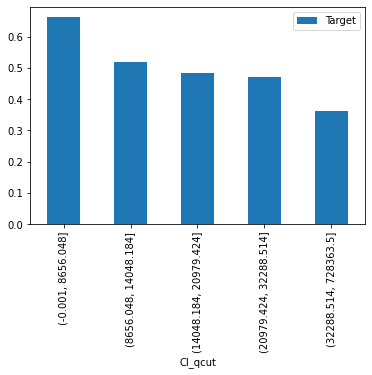

In [ ]:
df['CI'] = df['DCI'] + df['UCI']

df['CI_qcut'] = pd.qcut(df['CI'],5)
df.pivot_table(index='CI_qcut', values='Target', aggfunc='mean').plot(kind='bar')
df = df.drop('CI_qcut', axis=1)

Картина логичная, чем больше доход у людей, тем меньше проблем с кредитами.

С помощью логарифма сделаем распределение дохов нормальным:

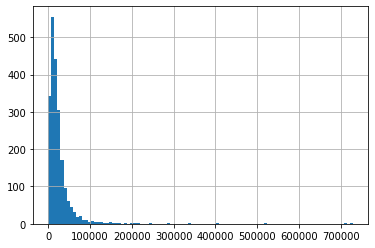

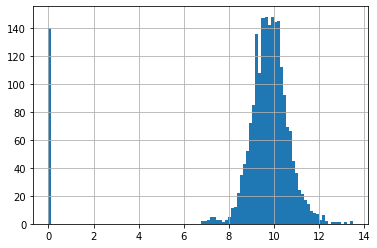

In [ ]:
df['CI_log'] = np.log(df['CI']+1)

df.CI.hist(bins=100)
plt.show()
df.CI_log.hist(bins=100)
plt.show()

По идее, доход семьи не должен быть меньше суммарно дохода. Для тех записей, где это не так, заменим значение дохода семьи на CI и возьмем логарифм:

In [ ]:
df.loc[df.PROFIT_FAMILY<df.CI, 'PROFIT_FAMILY'] = df[df.PROFIT_FAMILY<df.CI].CI

df['profit_family_log'] = np.log(df['PROFIT_FAMILY']+1)

STANDING_IN_MONTHS_LAST - стаж работы на последнем месте работы в мес. 

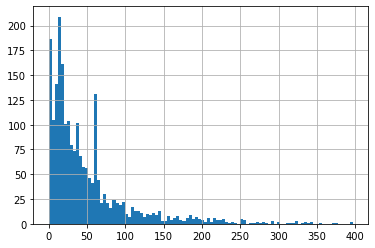

In [ ]:
df.STANDING_IN_MONTHS_LAST.hist(bins=100);

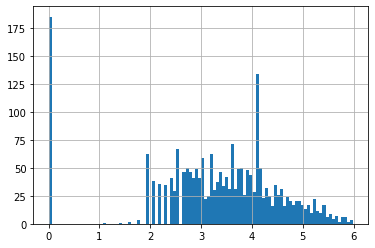

In [ ]:
df['standing_log'] = np.log(df['STANDING_IN_MONTHS_LAST']+1)

df['standing_log'].hist(bins=100);

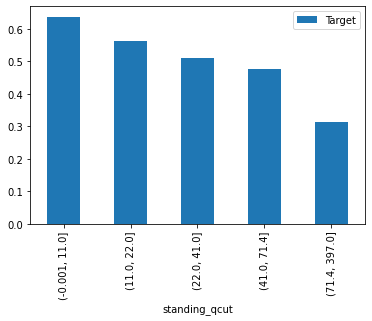

In [ ]:
df['standing_qcut'] = pd.qcut(df['STANDING_IN_MONTHS_LAST'],5)
df.pivot_table(index='standing_qcut', values='Target', aggfunc='mean').plot(kind='bar')
df = df.drop('standing_qcut', axis=1)

Чем больше стаж, тем надежнее заемщик

TRANSPORT_AMOUNT - количество ТС в собственности

In [ ]:
df.pivot_table(index='TRANSPORT_AMOUNT', values='Target', aggfunc= ('count','mean'))

,count,mean
TRANSPORT_AMOUNT,,
-3,1.0,1.000000
-2,2.0,1.000000
-1,3.0,1.000000
0,1677.0,0.540847
1,446.0,0.347534
2,28.0,0.357143
3,2.0,1.000000


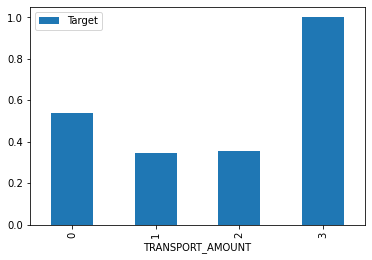

In [ ]:
df[df.TRANSPORT_AMOUNT>=0].pivot_table(index='TRANSPORT_AMOUNT', values='Target', aggfunc='mean').plot(kind='bar')

Ввиду того, что существенной разницы по среднему показателю таргета у клиентов с 2 и 3 автомобилями нет, а так же того, что записей с этим показателем >=1 мало, преобразуем в бинарный признак (да бОльших данных, возможно, так делать не стоило, необходимо смотреть на выборки)

отрицательные значения заменим на медиану


In [ ]:
df.loc[df.TRANSPORT_AMOUNT<0, 'TRANSPORT_AMOUNT'] = df[df.TRANSPORT_AMOUNT>=0].TRANSPORT_AMOUNT.median()

df.loc[df.TRANSPORT_AMOUNT>1, 'TRANSPORT_AMOUNT'] = 1

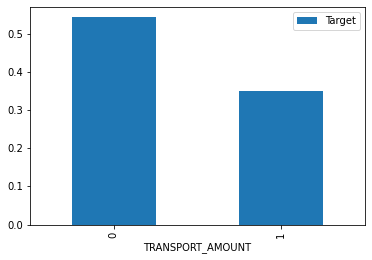

In [ ]:
df[df.TRANSPORT_AMOUNT>=0].pivot_table(index='TRANSPORT_AMOUNT', values='Target', aggfunc='mean').plot(kind='bar')

## Modeling

In [ ]:
df1 = df.copy()
df1['EDUCATION'] = df1['EDUCATION'].astype('category') 
df_ohe = pd.get_dummies(df1, drop_first=True, columns=['EDUCATION']) # OHE encoding - пробовал без него, результат хуже (кодируется у нас только образование)

scores = [0.71639232 0.69905264 0.69978138 0.79651063 0.75443583] 
mean score = 0.73323 +/- 0.03748


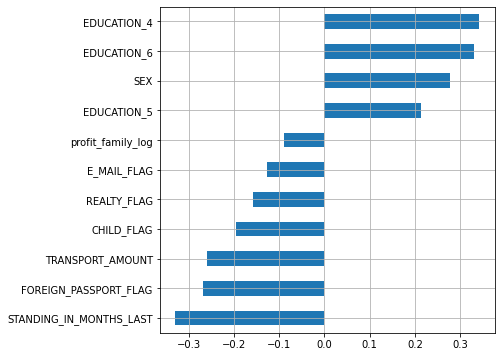

In [ ]:
X = df_ohe.drop(['Target', 'DCI', 'UCI', 'CI', 'CI_log', 'standing_log', 'ACCOUNTS_FLAG', 'PROFIT_FAMILY'], axis=1)
Y = df_ohe.Target

def plot_features_scores(model, data, target, column_names, model_type):
    model.fit(data, target)
    if model_type == 'lr':
        (pd.DataFrame(data={'score': model['lr'].coef_[0]},
                      index=column_names).sort_values(by='score').plot(kind='barh', grid=True, figsize=(6,6), legend=False));
    else: raise KeyError('Unknown model_type')

lr_pip = Pipeline([
               ('scale', StandardScaler()),
               ('lr', LogisticRegression(#solver='liblinear',
                                         #penalty='l1',
                                         #max_iter=200,
                                         class_weight='balanced',
                                         random_state=SEED)
               )])
scores = cross_val_score(estimator=lr_pip, X=X, y=Y, 
                         cv=5, scoring='roc_auc', n_jobs=-1)
print('scores = {} \nmean score = {:.5f} +/- {:.5f}'.format(scores, scores.mean(), scores.std()))

plot_features_scores(model=lr_pip, data=X, target=Y, column_names=X.columns, model_type='lr')

In [ ]:
log_reg = LogisticRegression(class_weight='balanced',
                                         random_state=SEED)

model_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', log_reg)]
)

param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'model__penalty': ['none', 'l2']}

grid = GridSearchCV(model_pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X, Y)
print(grid.best_params_)
print(grid.best_score_)

{'model__C': 0.1, 'model__penalty': 'l2'}
0.7334530417583819


- Удаленные параметры подбирались исходя из коэффициентов в модели.
- Лучшие результаты получились, когда мы из денежный признаков оставили только покатель семейного дохода (который предобрабатывается по условию - не меньше суммарного индвидуального дохода)

### CatBoost

In [ ]:
df_cat = df_ohe.copy()
X_cb = df_cat.drop(['Target', 'DCI', 'UCI', 'CI', 'CI_log', 'standing_log', 'ACCOUNTS_FLAG', 'PROFIT_FAMILY'], axis=1)
y_cb = df_cat.Target


params = {'eval_metric':'AUC',
          'silent':True,
          'random_seed': SEED
         }

cb_pip = Pipeline([
               ('scale', StandardScaler()),
               ('cb', CatBoostClassifier(**params
                                        )
               )])
scores = cross_val_score(estimator=cb_pip, X=X_cb, y=y_cb, 
                         cv=5, scoring='roc_auc', n_jobs=-1)
scores.mean()

0.7046573746151853

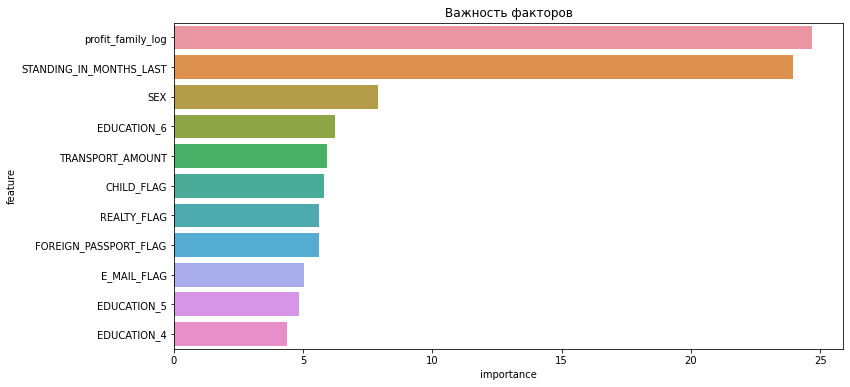

In [ ]:
params = {'eval_metric':'AUC',
          'silent':True,
          'random_seed': 42
         }
cb = CatBoostClassifier(**params)
cb.fit(X_cb, y_cb)#, 

feature_importance_df = cb.get_feature_importance(prettified=True)
feature_importance_df.columns = ['feature', 'importance']

plt.figure(figsize=(12, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df);
plt.title('Важность факторов');

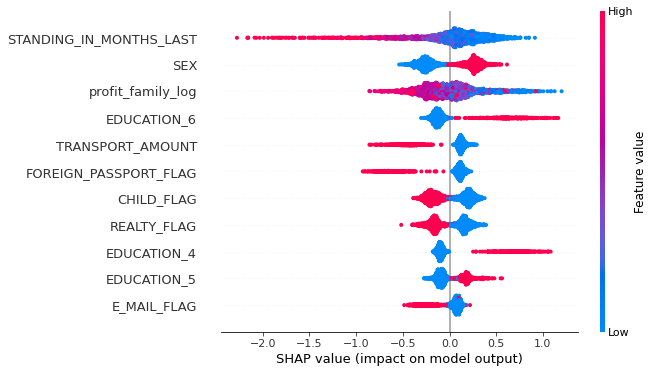

In [ ]:
explainer = shap.TreeExplainer(cb)
shap_values = explainer.shap_values(df_cat.drop(['Target', 'DCI', 'UCI', 'CI', 'CI_log', 'standing_log', 'ACCOUNTS_FLAG', 'PROFIT_FAMILY'], axis=1))
shap.summary_plot(shap_values, df_cat.drop(['Target', 'DCI', 'UCI', 'CI', 'CI_log', 'standing_log', 'ACCOUNTS_FLAG', 'PROFIT_FAMILY'], axis=1))

In [ ]:
cb = CatBoostClassifier(random_seed=SEED, silent=True)

model_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('cb', cb)]
)

param_grid = {
    'cb__eval_metric':['AUC'],
    'cb__depth': [4, 16],
    'cb__learning_rate': [0.01, 0.1],
    'cb__l2_leaf_reg': [1, 4],
    'cb__iterations': [100, 300],
    #'cb__early_stopping_rounds': [30]
}

grid = GridSearchCV(model_pipe, param_grid, cv=4, scoring='roc_auc', n_jobs=-1)
grid.fit(X_cb, y_cb)
print(grid.best_params_)
print(grid.best_score_)

#'early_stopping_rounds': 200,

~ 72,5 - результат не сохранился, не было возможности прогнать еще раз или на большее широкой сетке

#### Критерии выбора модели:
- **интерпретируемость**, поэтому в первую очередь рассматривается логистическая регрессия, кроме того, можно было бы попробовать дерево решений небольшой глубины и опираться на саму логику построения дерева. Более сложные модели можно интерпретировать с помощью важности признаков и SHAP значений, однако в специфики скорринга, как я понимаю, это не подойдет.
- точность
- способность работы на ограниченной выборке данных (как в тестовом)


#### Стабильна ли и не переобучена ли модель?
**Модель можно считать стабильной и непереобученной потому, что:**
- модель подбирается и валидируется с помощью кросс-валидации, подбор признаков осуществляется аналогично, кроме того, в моделях учтены параметры регуляризации, которые "штрафуют" модель за большие значения весов
- средняя метрика ROC AUC у регресси получилась 73% с отклонением 0.03748

#### Можно было сделать еще:
- сделать "производные" признаки, например, попробовать кодировать категориальные переменные средними доходами
- в качестве интерпретируемой модели попробовать неглубокое дерево решений
- подобрать параметры в более широком диапазоне
- использовать другие бустинги (изначально CatBoost выбрал ввиду опредленного кол-ва категориальный признаков, однако, в итоге они были закодированы по принципу OHE)